# Movies Data Correlation Analysis using Python

### 1. Introduction

This project aims to identify the strongest correlation with gross earnings in the movie industry.

**Understanding Correlation**

Correlation is a statistical measure indicating how closely related two variables are. It does not establish causation but rather illustrates whether a relationship exists between variables and the direction and strength of that relationship.

**Different Types of Correlation Coefficients**

1. **Pearson Correlation Coefficient (Pearson's r):** This commonly used measure is appropriate when both variables are continuous and exhibit a linear relationship. Pearson's r ranges from -1 to 1, indicating perfect negative correlation (-1), perfect positive correlation (1), and no correlation (0).
2. **Spearman Rank Correlation (Spearman's ρ):** Used for ordinal or ranked data, Spearman's ρ assesses the monotonic relationship between variables.
3. **Kendall Tau Rank Correlation (Kendall's τ):*** Similar to Spearman's ρ, Kendall's τ measures the strength and direction of association based on concordant and discordant pairs of ranked data points.


### 2. Data description

The dataset comprises information on 6,820 movies spanning the years 1986 to 2016, with an average of 220 movies per year. Each movie is characterized by 15 attributes, including budget, company, country, director, gross earnings, name, rating, release date, runtime, score, votes, lead actor, writer, and year of release.

### 3. Data Wrangling
Through meticulous data wrangling, including the handling of null values, duplicates, and inconsistencies, the dataset is prepared for analysis. Techniques such as importing necessary libraries, exploring dataset previews using shape and head functions, and employing data cleaning methods are utilized. The aim is to ensure data integrity and readiness for correlation analysis, seeking to uncover factors positively associated with gross income in the movie industry.


First we import all necessary libraries and CSV files.

In [1]:
# Import Libraries  
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [2]:
#Setting the default style for plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# Read dataset
data = pd.read_csv('/Users/admin/Desktop/Python/Movies/movies.csv')

We preview information of data set to know with what data we are working with.

In [4]:
data.shape

(7668, 15)

In [5]:
data.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
print(data.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


To ensure data integrity and accuracy, we remove any duplicate rows or null values. This step help eliminate redundancy and prevent skewed analysis results.

In [7]:
# Looking for missing data
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# Drop missing values rows
data = data.dropna()

In [9]:
# Drop duplicated rows
data = data.drop_duplicates()

In [10]:
# Type conversion for data simplicity
data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')

In [11]:
# Fix data inconsistencies
data['yearcorrect'] = data['released'].str.extract(pat = '([0-9]{4})').astype(int)

# Drop incorrect year column
data.drop(columns=['year'], inplace=True)

In [12]:
# Sort data by gross
data.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


### 4. Finding correlations in data

Our initial thought is that the budget is related to the gross income.

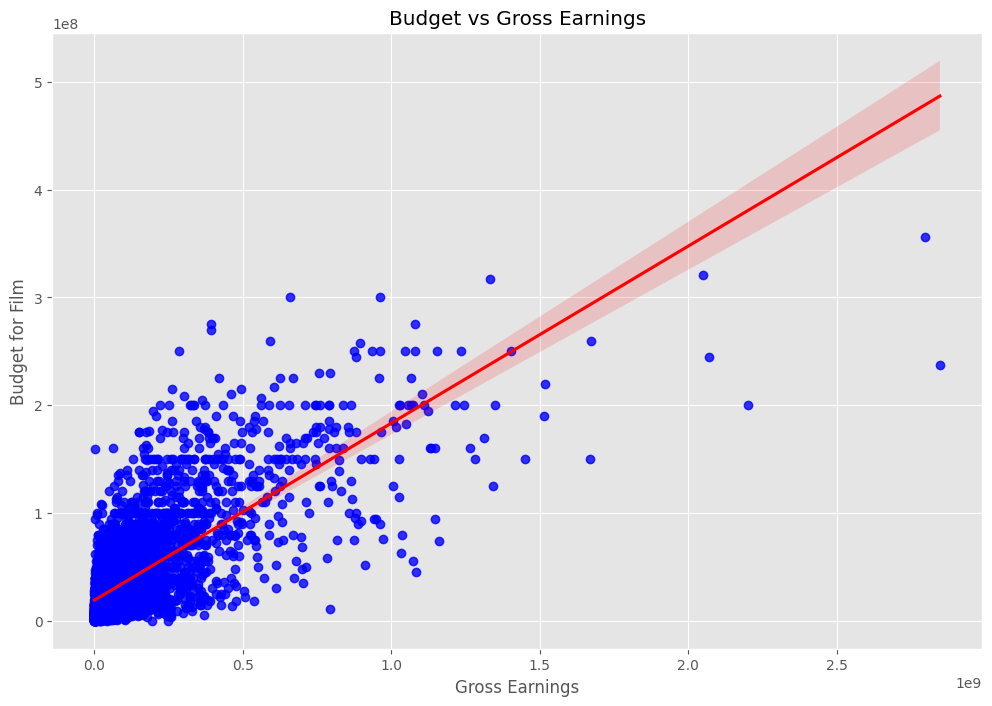

In [13]:
# Plot budget vs. gross
sns.regplot(x="gross", y="budget", data=data, scatter_kws={"color":"blue"}, line_kws={"color":"red"})

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

With this scatter plot we can see that our prediction was correct and that the variables have a positive correlation.

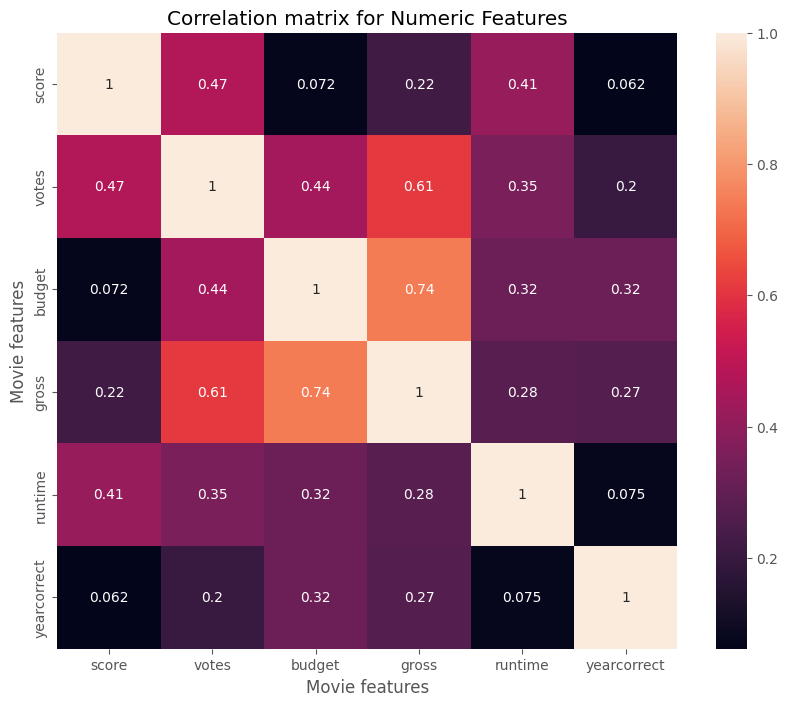

In [14]:
# Correlation matrix between only numeric values
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()


With the comparison of the relationship between the numerical values we can see that the votes also have an influence under the gross income.

In [15]:
# Change string into numerical values to analyze the correlation between all variables 
data_numerized = data


for col_name in data_numerized.columns:
    if(data_numerized[col_name].dtype == 'object'):
        data_numerized[col_name]= data_numerized[col_name].astype('category')
        data_numerized[col_name] = data_numerized[col_name].cat.codes
        
data_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,2020


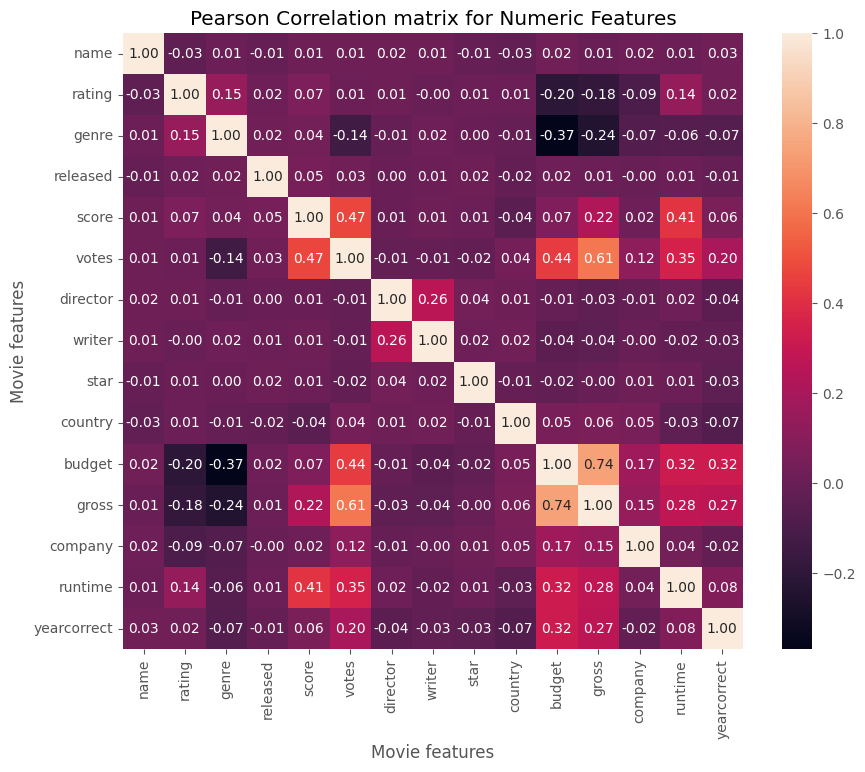

In [16]:
#  Correlation matrix between all columns using Pearson method
correlation_matrix = data_numerized.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title("Pearson Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

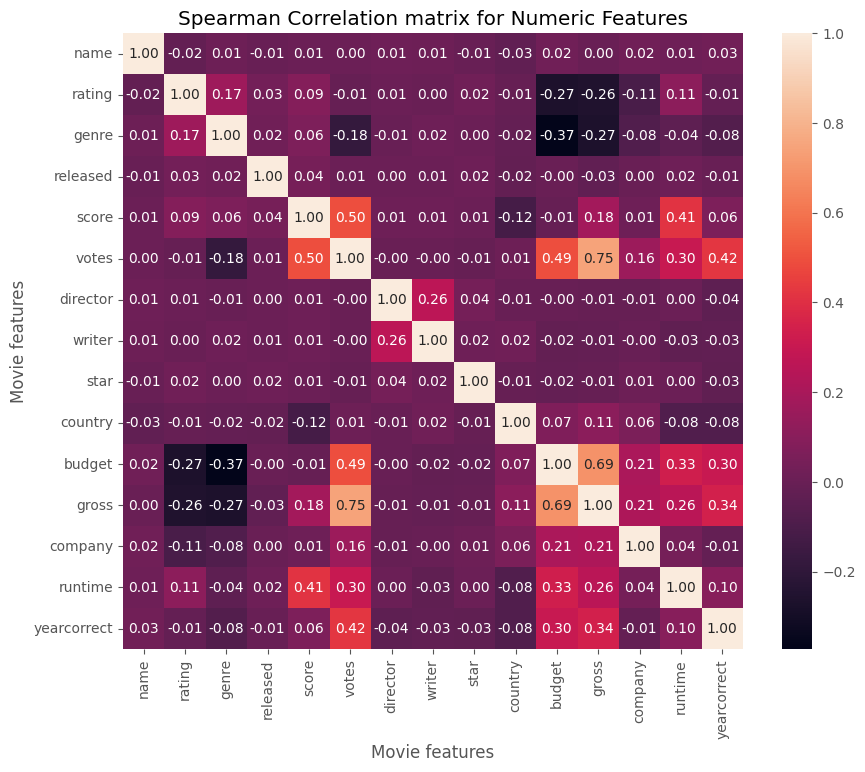

In [17]:
#  Correlation matrix between all columns using Spearman method
correlation_matrix = data_numerized.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title("Spearman Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

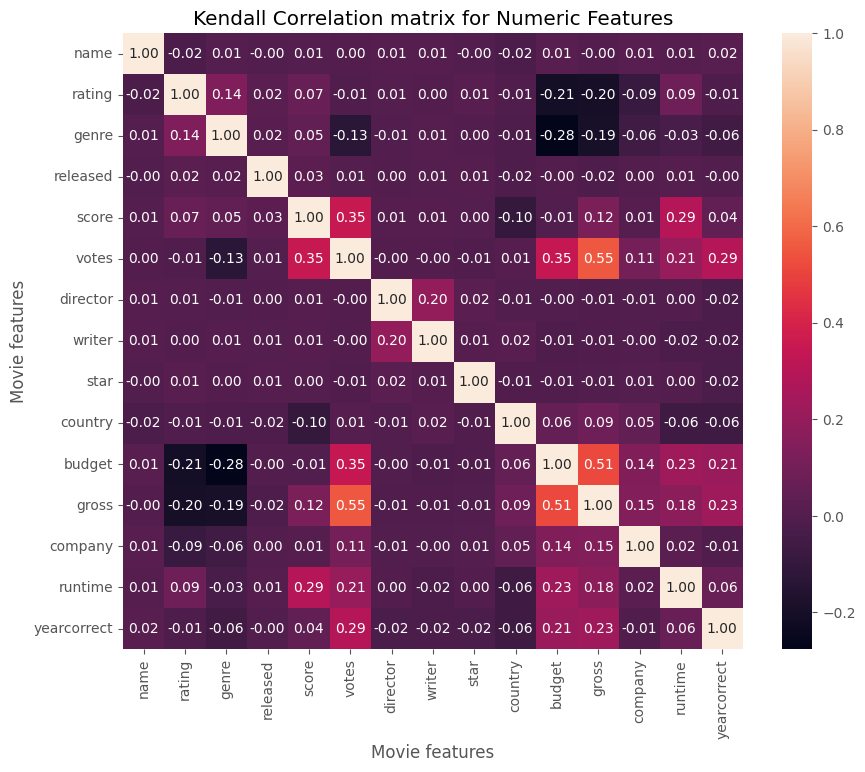

In [18]:
#  Correlation matrix between all columns using Kendall method
correlation_matrix = data_numerized.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title("Kendall Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

We decided to assign unique numerical values to the string attributes, allowing us to explore potential correlations with gross income. Employing all three correlation methods, we discovered that factors such as company, runtime, and year of release could also impact a movie's gross income.

In [19]:
CompanyGrossSum = data.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
1426    54610959970
1397    51241105418
452     42356430218
1108    40021704691
1382    39542573303
1423    35833650748
1044    19612851164
983     15065592411
550     11873612858
551     11593807697
1367    10664679494
1001     8937010092
1309     8318570396
1134     7886344526
682      7243673721
Name: gross, dtype: int64

### 5. Key Findings

* The variable with the greatest impact on gross income is the budget.
* Higher budgets correlate with higher gross income.
* The movie's production company also influences gross income.
* Warner Bros., Universal Pictures, and Columbia Pictures are the top three movie companies with the highest income.
* More recent movies tend to have higher gross income.
* Longer movies tend to generate higher income.